In [1]:
# If the data is missing, download from the links below
# ! wget https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
# ! wget https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names

# Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import random

In [3]:
headers = ["type", "cap-shape", "cap-surface", "cap-color", 
           "bruises", "odor", "gill-attachment", "gill-spacing", 
           "gill-size", "gill-color", "stalk-shape", "stalk-root", 
           "stalk-surface-above-ring", "stalk-surface-below-ring", 
           "stalk-color-above-ring", "stalk-color-below-ring", 
           "veil-type", "veil-color", "ring-number", "ring-type", 
           "spore-print-color", "population", "habitat"]

df = pd.read_csv("agaricus-lepiota.data", names=headers)
df.head()

,type,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
missing_col = 'stalk-root' # stalk root is the only column which contains missing values
val_count = df[missing_col].value_counts()
not_missing = sum(val_count) - val_count['?']
weights = (val_count / not_missing).drop('?')
weights

b    0.669029
e    0.198441
c    0.098512
r    0.034018
Name: stalk-root, dtype: float64

In [5]:
for i, row in df[missing_col].iteritems():
    if row == '?':
        df[missing_col][i] = weights.sample(weights=weights).index[0]

df[missing_col].value_counts()

b    5487
e    1564
c     795
r     278
Name: stalk-root, dtype: int64

In [6]:
df.describe()

,type,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Find data statistics

In [7]:
def find_stats(df):
    stat_df = df.describe().T
    stat_df['relative freq'] = stat_df['freq'] / stat_df['count']
    stat_df = stat_df[['top', 'freq', 'relative freq']]
    return stat_df

# find statistics of whole datframe
find_stats(df)

,top,freq,relative freq
type,e,4208,0.517971
cap-shape,x,3656,0.450025
cap-surface,y,3244,0.399311
cap-color,n,2284,0.281142
bruises,f,4748,0.584441
odor,n,3528,0.434269
gill-attachment,f,7914,0.974151
gill-spacing,c,6812,0.838503
gill-size,b,5612,0.690793
gill-color,b,1728,0.212703


In [8]:
# find statistics of edible mushrooms
find_stats(df[df['type'] == 'e'])

,top,freq,relative freq
type,e,4208,1.0
cap-shape,x,1948,0.462928
cap-surface,f,1560,0.370722
cap-color,n,1264,0.30038
bruises,t,2752,0.653992
odor,n,3408,0.809886
gill-attachment,f,4016,0.954373
gill-spacing,c,3008,0.714829
gill-size,b,3920,0.931559
gill-color,w,956,0.227186


In [9]:
# find statistics of poisonous mushrooms
find_stats(df[df['type'] == 'p'])

,top,freq,relative freq
type,p,3916,1.0
cap-shape,x,1708,0.436159
cap-surface,y,1740,0.444331
cap-color,n,1020,0.26047
bruises,f,3292,0.840654
odor,f,2160,0.551583
gill-attachment,f,3898,0.995403
gill-spacing,c,3804,0.971399
gill-size,n,2224,0.567926
gill-color,b,1728,0.441267


In [10]:
drop_col = [col for col in df if len(df[col].unique()) < 2] # veil-type has only one unique value
df = df.drop(drop_col, axis=1)
df.head()

,type,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


# Data Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# remove veil-type column
headers.remove("veil-type")

In [13]:
most_edible = [[0], [0], [0], [0],[0],[0],[0]]

for i in range(1,len(headers)-1):
    arr1 = df[headers[i]].unique()
    for j in range(i+1, len(headers)):
        arr2 = df[headers[j]].unique()
        
        for k in arr1:
            for l in arr2:
                edible_num = df.loc[(df[headers[i]] == k) & (df[headers[j]] == l) & (df["type"] == "e")].shape[0]
                
                for m in range(len(most_edible)):
                    if most_edible[m][0] < edible_num:
                        most_edible.insert(m, [edible_num, [headers[i],k], [headers[j],l]])
                        most_edible.pop()
                        break
                    
for i in most_edible:
    print(i)
            

[4016, ['gill-attachment', 'f'], ['veil-color', 'w']]
[3728, ['gill-attachment', 'f'], ['gill-size', 'b']]
[3728, ['gill-size', 'b'], ['veil-color', 'w']]
[3488, ['gill-attachment', 'f'], ['ring-number', 'o']]
[3488, ['veil-color', 'w'], ['ring-number', 'o']]
[3448, ['gill-attachment', 'f'], ['stalk-surface-above-ring', 's']]
[3448, ['stalk-surface-above-ring', 's'], ['veil-color', 'w']]


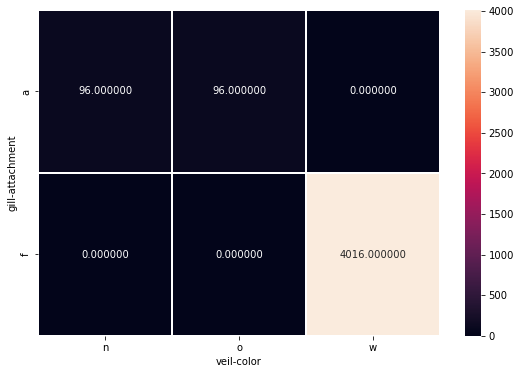

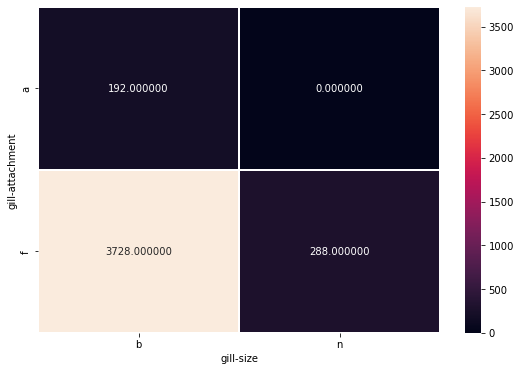

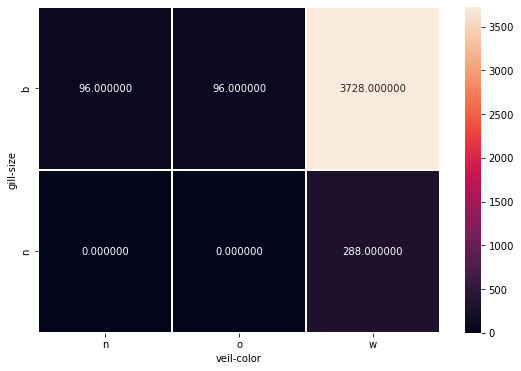

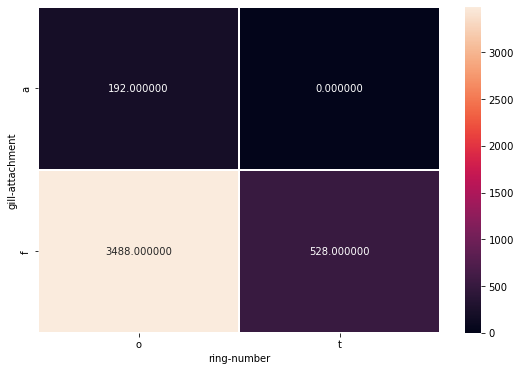

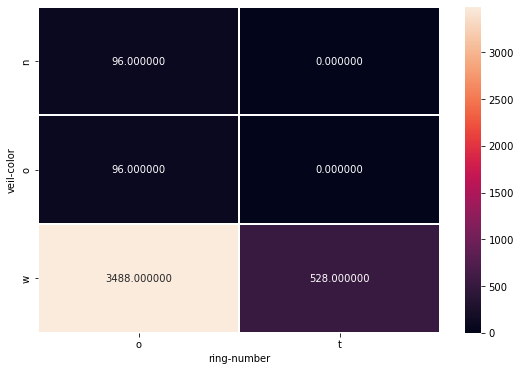

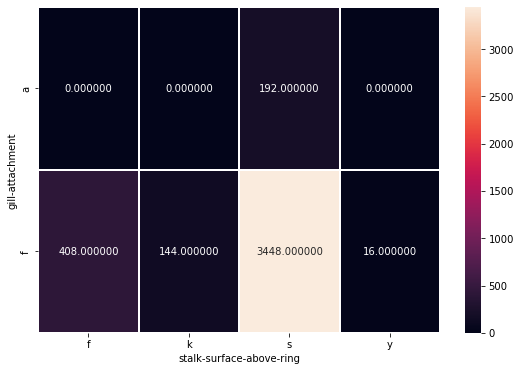

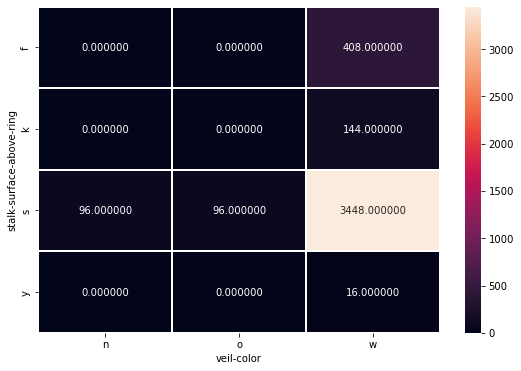

In [14]:
printdf = df.loc[df["type"] == "e"]

for element in most_edible:
    result = printdf.pivot_table(index=element[1][0], columns=element[2][0], values="type", aggfunc='count')
    result = result.fillna(0)

    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(result, annot=True, fmt="f", linewidths=.3, ax=ax)


# Base Models
1. k-Nearest Neighbors
2. Decision Tree
2. Random Forest
3. Categorical Naïve Bayes
4. Logistic Regression
5. Perceptron
7. Multilayer Perceptron

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [16]:
X, y = df.drop('type', axis=1), df['type']
X = pd.get_dummies(X, drop_first=True)

np_X, np_y = np.array(X), np.array(y)
X_train, X_test, y_train, y_test = train_test_split(np_X, np_y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((5686, 94), (2438, 94))

In [17]:
def fit_given_model(model_name, model, train_data, test_data=None):
    data = []
    indices = []
    
    # Split X_train and y_train
    X_train, y_train = train_data
    
    # Fit given model and calculate accuracy
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    indices.append('Train Accuracy')
    data.append(train_acc)

    train_prec = precision_score(y_train, y_train_pred, pos_label='e')
    indices.append('Train Precision')
    data.append(train_prec)
    
    train_rec = recall_score(y_train, y_train_pred, pos_label='e')
    indices.append('Train Recall')
    data.append(train_rec)
                    
    train_f1 = f1_score(y_train, y_train_pred, pos_label='e')
    indices.append('Train F1')
    data.append(train_f1)
    
    # Calculate test accuracy if test data
    if test_data:
        # Split X_test and y_test
        X_test, y_test = test_data
        y_test_pred = model.predict(X_test)
        
        test_acc = accuracy_score(y_test, y_test_pred)
        indices.append('Test Accuracy')
        data.append(test_acc)

        test_prec = precision_score(y_test, y_test_pred, pos_label='e')
        indices.append('Test Precision')
        data.append(test_prec)

        test_rec = recall_score(y_test, y_test_pred, pos_label='e')
        indices.append('Test Recall')
        data.append(test_rec)

        test_f1 = f1_score(y_test, y_test_pred, pos_label='e')
        indices.append('Test F1')
        data.append(test_f1)
    
    return pd.DataFrame({model_name: data}, index=indices)


## k-Nearest Neighbors

In [18]:
knn = KNeighborsClassifier(n_neighbors=2)
result_df = fit_given_model('kNN', knn, train_data=(X_train, y_train), test_data=(X_test, y_test))
result_df

,kNN
Train Accuracy,1.0
Train Precision,1.0
Train Recall,1.0
Train F1,1.0
Test Accuracy,1.0
Test Precision,1.0
Test Recall,1.0
Test F1,1.0


## Decision Tree

In [19]:
decision_tree = DecisionTreeClassifier()
result_df = fit_given_model('Decision Tree', decision_tree, train_data=(X_train, y_train), test_data=(X_test, y_test))
result_df

,Decision Tree
Train Accuracy,1.0
Train Precision,1.0
Train Recall,1.0
Train F1,1.0
Test Accuracy,1.0
Test Precision,1.0
Test Recall,1.0
Test F1,1.0


[Text(0.5, 0.9375, 'X[22] <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2951, 2735]'),
 Text(0.23076923076923078, 0.8125, 'X[17] <= 0.5\ngini = 0.28\nsamples = 3191\nvalue = [537, 2654]'),
 Text(0.15384615384615385, 0.6875, 'gini = 0.0\nsamples = 2284\nvalue = [0, 2284]'),
 Text(0.3076923076923077, 0.6875, 'X[41] <= 0.5\ngini = 0.483\nsamples = 907\nvalue = [537, 370]'),
 Text(0.23076923076923078, 0.5625, 'X[49] <= 0.5\ngini = 0.444\nsamples = 554\nvalue = [184, 370]'),
 Text(0.15384615384615385, 0.4375, 'X[27] <= 0.5\ngini = 0.24\nsamples = 430\nvalue = [60, 370]'),
 Text(0.07692307692307693, 0.3125, 'gini = 0.0\nsamples = 370\nvalue = [0, 370]'),
 Text(0.23076923076923078, 0.3125, 'gini = 0.0\nsamples = 60\nvalue = [60, 0]'),
 Text(0.3076923076923077, 0.4375, 'gini = 0.0\nsamples = 124\nvalue = [124, 0]'),
 Text(0.38461538461538464, 0.5625, 'gini = 0.0\nsamples = 353\nvalue = [353, 0]'),
 Text(0.7692307692307693, 0.8125, 'X[79] <= 0.5\ngini = 0.063\nsamples = 2495\nvalue = [2414, 81

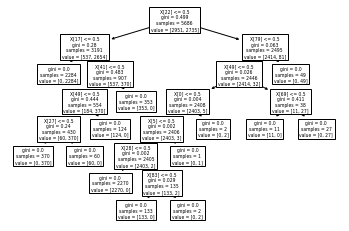

In [20]:
plot_tree(decision_tree)

## Random Forest

In [21]:
forest = RandomForestClassifier(n_estimators=10)
result_df = fit_given_model('Random Forest', forest, train_data=(X_train, y_train), test_data=(X_test, y_test))
result_df

,Random Forest
Train Accuracy,1.0
Train Precision,1.0
Train Recall,1.0
Train F1,1.0
Test Accuracy,1.0
Test Precision,1.0
Test Recall,1.0
Test F1,1.0


## Categorical Naïve Bayes

In [22]:
cat_nb = CategoricalNB()
result_df = fit_given_model('Categorical Naïve Bayes', cat_nb, train_data=(X_train, y_train), test_data=(X_test, y_test))
result_df

,Categorical Naïve Bayes
Train Accuracy,0.942490
Train Precision,0.908214
Train Recall,0.989156
Train F1,0.946959
Test Accuracy,0.934783
Test Precision,0.892143
Test Recall,0.993636
Test F1,0.940158


## Logistic Regression

In [23]:
log_reg = LogisticRegression()
result_df = fit_given_model('Logistic Regression', log_reg, train_data=(X_train, y_train), test_data=(X_test, y_test))
result_df

,Logistic Regression
Train Accuracy,0.999472
Train Precision,0.998984
Train Recall,1.000000
Train F1,0.999492
Test Accuracy,0.999180
Test Precision,0.998411
Test Recall,1.000000
Test F1,0.999205


## Perceptron

In [24]:
perceptron = Perceptron()
result_df = fit_given_model('Perceptron', perceptron, train_data=(X_train, y_train), test_data=(X_test, y_test))
result_df

,Perceptron
Train Accuracy,1.000000
Train Precision,1.000000
Train Recall,1.000000
Train F1,1.000000
Test Accuracy,0.999180
Test Precision,0.998411
Test Recall,1.000000
Test F1,0.999205


## Multilayer Perceptron

In [25]:
mlp = MLPClassifier(solver='adam', activation='identity')
result_df = fit_given_model('Multilayer Perceptron', mlp, train_data=(X_train, y_train), test_data=(X_test, y_test))
result_df

,Multilayer Perceptron
Train Accuracy,1.0
Train Precision,1.0
Train Recall,1.0
Train F1,1.0
Test Accuracy,1.0
Test Precision,1.0
Test Recall,1.0
Test F1,1.0


## Clustering

In [26]:
from sklearn.cluster import KMeans

### k-Means

In [27]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train, y_train)

kmeans.score(X_train, y_train)
kmeans.score(X_test, y_test)

-18277.524237061276

## Fit all of the base models at once

In [28]:
def fit_all(model_dict, train_data, test_data=None):
    result_df = pd.DataFrame()

    for model_name, model in model_dict.items():
        df_model = fit_given_model(model_name, model, train_data=train_data, test_data=test_data)
        result_df = pd.concat([result_df, df_model], axis=1)

    return result_df

model_dict = {'kNN': KNeighborsClassifier(), 
              'Decision Tree': DecisionTreeClassifier(), 
              'Random Forest': RandomForestClassifier(), 
              'Categorical Naïve Bayes': CategoricalNB(), 
              'Logistic Regression': LogisticRegression(), 
              'Perceptron': Perceptron(), 
              'Multilayer Perceptron': MLPClassifier()}


    
result_df = fit_all(model_dict, train_data=(X_train, y_train), test_data=(X_test, y_test))
result_df

,kNN,Decision Tree,Random Forest,Categorical Naïve Bayes,Logistic Regression,Perceptron,Multilayer Perceptron
Train Accuracy,1.0,1.0,1.0,0.942490,0.999472,1.000000,1.0
Train Precision,1.0,1.0,1.0,0.908214,0.998984,1.000000,1.0
Train Recall,1.0,1.0,1.0,0.989156,1.000000,1.000000,1.0
Train F1,1.0,1.0,1.0,0.946959,0.999492,1.000000,1.0
Test Accuracy,1.0,1.0,1.0,0.934783,0.999180,0.999180,1.0
Test Precision,1.0,1.0,1.0,0.892143,0.998411,0.998411,1.0
Test Recall,1.0,1.0,1.0,0.993636,1.000000,1.000000,1.0
Test F1,1.0,1.0,1.0,0.940158,0.999205,0.999205,1.0


# Feature Selection and Reduction

In [29]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import chi2, SelectKBest

### PCA

In [30]:
# feature reduction 2 attributes instead of 94 attributes 
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X)
pca_X, y

(array([[-1.35639952,  0.11452929],
        [-1.2055648 , -0.75630753],
        [-1.41701892, -0.47177877],
        ...,
        [-0.66166182,  0.07763842],
        [ 0.50724002,  1.70295327],
        [-0.67253956,  0.0433592 ]]),
 0       p
 1       e
 2       e
 3       p
 4       e
        ..
 8119    e
 8120    e
 8121    e
 8122    p
 8123    e
 Name: type, Length: 8124, dtype: object)

In [31]:
# Fit all data after PCA
pca_X_train, pca_X_test, y_train, y_test = train_test_split(pca_X, y, train_size=0.7, random_state=42)

model_dict = {'kNN': KNeighborsClassifier(), 
              'Decision Tree': DecisionTreeClassifier(), 
              'Random Forest': RandomForestClassifier(), 
              'Logistic Regression': LogisticRegression(), 
              'Perceptron': Perceptron(), 
              'Multilayer Perceptron': MLPClassifier()}

result_df = fit_all(model_dict, train_data=(pca_X_train, y_train), test_data=(pca_X_test, y_test))
result_df

/Users/bugrahamzagundog/opt/anaconda3/envs/ai/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,kNN,Decision Tree,Random Forest,Logistic Regression,Perceptron,Multilayer Perceptron
Train Accuracy,0.939676,1.000000,0.999648,0.887091,0.852972,0.897995
Train Precision,0.911097,1.000000,0.999323,0.840862,0.845701,0.849190
Train Recall,0.979329,1.000000,1.000000,0.965097,0.876652,0.976957
Train F1,0.943982,1.000000,0.999661,0.898706,0.860899,0.908604
Test Accuracy,0.913043,0.888433,0.915915,0.882691,0.850697,0.888843
Test Precision,0.886179,0.894948,0.890788,0.832307,0.838002,0.838599
Test Recall,0.953858,0.887828,0.953858,0.967383,0.880668,0.971360
Test F1,0.918774,0.891374,0.921245,0.894776,0.858805,0.900111


### LDA

In [32]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda_X = lda.fit_transform(X, y)
lda_X

array([[ 16.32229184],
       [-15.49640968],
       [-14.33252341],
       ...,
       [-14.21950568],
       [ 15.48360521],
       [-13.36272338]])

In [33]:
# Fit all data after LDA
lda_X_train, lda_X_test, y_train, y_test = train_test_split(lda_X, y, train_size=0.7, random_state=42)

model_dict = {'kNN': KNeighborsClassifier(), 
              'Decision Tree': DecisionTreeClassifier(), 
              'Random Forest': RandomForestClassifier(), 
              'Logistic Regression': LogisticRegression(), 
              'Perceptron': Perceptron(), 
              'Multilayer Perceptron': MLPClassifier()}

result_df = fit_all(model_dict, train_data=(lda_X_train, y_train), test_data=(lda_X_test, y_test))
result_df

,kNN,Decision Tree,Random Forest,Logistic Regression,Perceptron,Multilayer Perceptron
Train Accuracy,0.999648,1.0,1.0,1.0,0.999648,0.999648
Train Precision,0.999323,1.0,1.0,1.0,0.999323,0.999323
Train Recall,1.000000,1.0,1.0,1.0,1.000000,1.000000
Train F1,0.999661,1.0,1.0,1.0,0.999661,0.999661
Test Accuracy,0.999590,1.0,1.0,1.0,0.999590,0.999590
Test Precision,0.999205,1.0,1.0,1.0,0.999205,0.999205
Test Recall,1.000000,1.0,1.0,1.0,1.000000,1.000000
Test F1,0.999602,1.0,1.0,1.0,0.999602,0.999602


### Chi2 Selected Features

In [34]:
# Choose best 2 attributes
best_chi = SelectKBest(chi2, k=3).fit(X, y)
print('Chosen attributes: ', best_chi.feature_names_in_[best_chi.get_support()])

selected_X = best_chi.transform(X)

selected_X_train, selected_X_test, y_train, y_test = train_test_split(selected_X, y, train_size=0.7, random_state=42)

model_dict = {'kNN': KNeighborsClassifier(), 
              'Decision Tree': DecisionTreeClassifier(), 
              'Random Forest': RandomForestClassifier(), 
              'Logistic Regression': LogisticRegression(), 
              'Perceptron': Perceptron(), 
              'Multilayer Perceptron': MLPClassifier()}

result_df = fit_all(model_dict, train_data=(selected_X_train, y_train), test_data=(selected_X_test, y_test))
result_df

Chosen attributes:  ['odor_f' 'odor_n' 'stalk-surface-above-ring_k']


,kNN,Decision Tree,Random Forest,Logistic Regression,Perceptron,Multilayer Perceptron
Train Accuracy,0.864052,0.891312,0.891312,0.891312,0.864052,0.891312
Train Precision,0.792427,0.967535,0.967535,0.967535,0.792427,0.967535
Train Recall,1.000000,0.818028,0.818028,0.818028,1.000000,0.818028
Train F1,0.884195,0.886522,0.886522,0.886522,0.884195,0.886522
Test Accuracy,0.847826,0.876128,0.876128,0.876128,0.847826,0.876128
Test Precision,0.772113,0.962246,0.962246,0.962246,0.772113,0.962246
Test Recall,1.000000,0.790772,0.790772,0.790772,1.000000,0.790772
Test F1,0.871404,0.868122,0.868122,0.868122,0.871404,0.868122
